In [1]:
import os
from PIL import Image, ImageFilter, ImageDraw, ImageFont
import xml.etree.ElementTree as ET

In [2]:
IMG_PATH_BASE = os.path.join("BCCD_Dataset", "BCCD", "JPEGImages")
XML_PATH_BASE = os.path.join("BCCD_Dataset", "BCCD", "Annotations")

(640, 480)


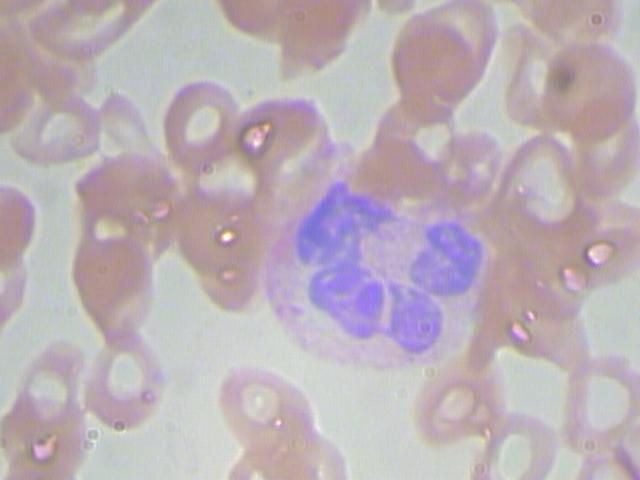

In [3]:
test_img_name = "BloodImage_00000"

test_img_path = os.path.join(IMG_PATH_BASE, test_img_name + ".jpg")
test_xml_path = os.path.join(XML_PATH_BASE, test_img_name + ".xml")

img = Image.open(test_img_path)
print(img.size)
img

In [ ]:
img_draw = ImageDraw.Draw(img)
img_draw.rectangle((100, 100, 200, 200), outline=(255, 0, 0))
img_draw.rectangle((300, 300, 400, 400), outline=(255, 0, 0))
img

In [ ]:
xml_tree = ET.parse(test_xml_path)

In [ ]:
count = int(0)
for elem in xml_tree.iter():
#     print(elem.tag)
#     print(type(elem.tag))
    if "object" in elem.tag:
        print(f"count {count} ====")
        for attr in list(elem):
#             print("A")
            print(attr.tag)
    count += 1
    if count > 30:
        break

In [ ]:
img = Image.open(test_img_path)
draw = ImageDraw.Draw(img)

font = ImageFont.truetype("arial.ttf", size=10)

def set_text(text, origin, draw, color):
    text = " " + text + " "
    txw, txh = draw.textsize(text, font=font)
    draw.rectangle(
        (origin[0], origin[1], origin[0]+txw, origin[1]+txh), 
        outline=(255, 0, 0),
        fill=color)
    draw.text(origin, text, fill=(255, 255, 255))
    return None
    

xml_tree = ET.parse(test_xml_path)
for elem in xml_tree.iter():
    if 'object' in elem.tag:
        for attr in list(elem):
            if 'name' in attr.tag:
                name = attr.text
            if 'bndbox' in attr.tag:
                for dim in list(attr):
                    if 'xmin' in dim.tag:
                        xmin = int(round(float(dim.text)))
                    if 'ymin' in dim.tag:
                        ymin = int(round(float(dim.text)))
                    if 'xmax' in dim.tag:
                        xmax = int(round(float(dim.text)))
                    if 'ymax' in dim.tag:
                        ymax = int(round(float(dim.text)))
                if name[0] == "R":
                    color = (255, 0, 0)
                    label = "R"
                elif name[0] == "W":
                    color = (0, 255, 0)
                    label = "W"
                elif name[0] == "P":
                    color = (0, 0, 255)
                    label = "P"
                draw.rectangle((xmin, ymin, xmax, ymax), outline=color)
                set_text(text=label, origin=(xmin, ymin), draw=draw, color=color)

img

In [ ]:
f = 5

from itertools import product
for i, j in product(range(f), repeat=2):
    print(f"{i}, {j}")

In [ ]:
import cv2
img_cv = cv2.imread(test_img_path)

In [ ]:
type(img_cv)

In [ ]:
img_cv.shape

In [ ]:
import numpy as np
img_arr = np.array(img)
print(type(img_arr))
img_arr.shape